<a href="https://colab.research.google.com/github/otanet/NumPyro_advanced_20211221-/blob/main/03_check_students_tdist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Student's t-distribution

## Install Packages

In [1]:
!pip install --upgrade jax==0.2.17 jaxlib==0.1.71+cuda111 -f https://storage.googleapis.com/jax-releases/jax_releases.html
!pip install numpyro==0.7.2
!pip install arviz==0.11.2

Looking in links: https://storage.googleapis.com/jax-releases/jax_releases.html
     |████████████████████████████████| 693 kB 26.5 MB/s 
  Created wheel for jax: filename=jax-0.2.17-py3-none-any.whl size=797307 sha256=74574a8400a53f5a61617c1c1e58ed0f2c8ba47f9723666cf8d2c4ea7f312bbc
  Stored in directory: /root/.cache/pip/wheels/ab/97/b8/d5732f229a9069d28dee175ebcd36d61569e8fc10a34aafb4d
Successfully built jax
  Attempting uninstall: jax
    Found existing installation: jax 0.2.25
    Uninstalling jax-0.2.25:
      Successfully uninstalled jax-0.2.25
     |████████████████████████████████| 250 kB 28.3 MB/s 
     |████████████████████████████████| 1.6 MB 31.1 MB/s 
  Attempting uninstall: arviz
    Found existing installation: arviz 0.11.4
    Uninstalling arviz-0.11.4:
      Successfully uninstalled arviz-0.11.4


【重要】パッケージのインストール完了後に、ランタイムを再起動して下さい！

## Import Packages

In [2]:
import numpyro
import numpyro.distributions as dist

import arviz as az

import jax
import jax.numpy as jnp

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

In [3]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (8,5)

## Student's t-distribution

https://ja.wikipedia.org/wiki/T%E5%88%86%E5%B8%83

$\nu = 1$ の場合は、コーシー分布に一致する

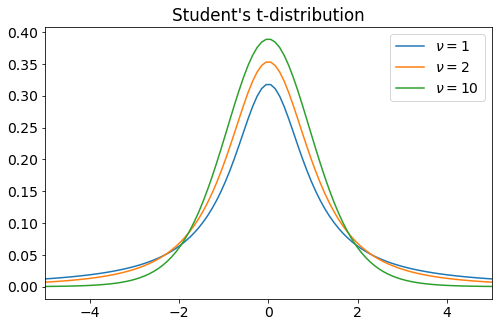

In [4]:
x = np.linspace(-5, 5, 100)

for nu in [1, 2, 10]:

    y = scipy.stats.t.pdf(x, nu)
    
    plt.plot(x, y, label=r'$\nu={}$'.format(nu))

plt.title('Student\'s t-distribution')
plt.xlim([-5, 5])
plt.legend();

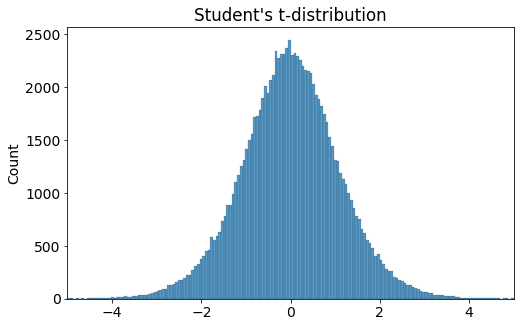

In [5]:
nu = 10

y = dist.StudentT(nu, loc=0, scale=1).sample(jax.random.PRNGKey(0), sample_shape=(100000,))

sns.histplot(y)

plt.title('Student\'s t-distribution')
plt.xlim([-5, 5]);

## Gamma distribution

https://ja.wikipedia.org/wiki/%E3%82%AC%E3%83%B3%E3%83%9E%E5%88%86%E5%B8%83

$\alpha=1$ のとき、指数分布に一致する

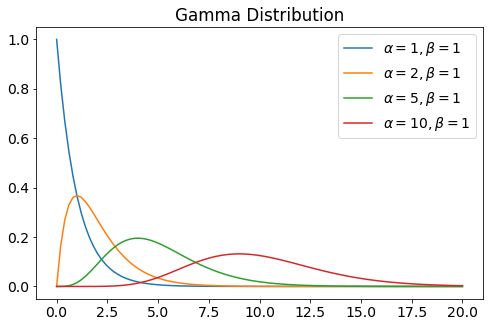

In [6]:
x = np.linspace(0, 20, 100)

for alpha in [1, 2, 5, 10]:

    y = scipy.stats.gamma.pdf(x, alpha)
    
    plt.plot(x, y, label=r'$\alpha={}, \beta=1$'.format(alpha))

plt.title('Gamma Distribution')
plt.legend();

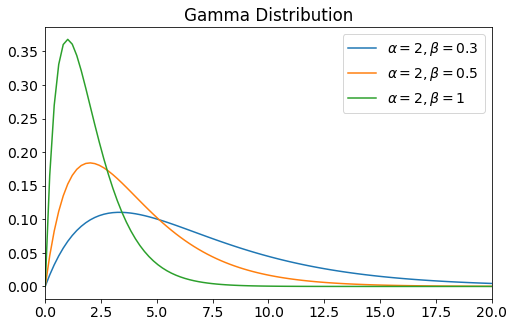

In [7]:
for beta in [0.3, 0.5, 1]:

    scale = 1 / beta
    
    y = scipy.stats.gamma.pdf(x, 2, scale=scale)
    
    plt.plot(x, y, label=r'$\alpha=2, \beta={}$'.format(beta))

plt.title('Gamma Distribution')
plt.xlim([0, 20])
plt.legend();

## Exponential Distribution

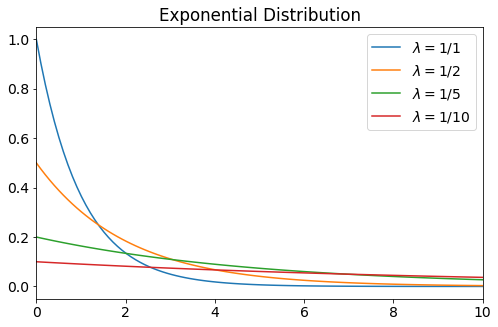

In [8]:
x = np.linspace(0, 10, 100)

for scale in [1, 2, 5, 10]:
    
    y = scipy.stats.expon.pdf(x, scale=scale)
    
    plt.plot(x, y, label=r'$\lambda=1/{:.0f}$'.format(scale))

plt.title('Exponential Distribution')
plt.xlim([0, 10])
plt.legend();

## Prior for nu in Student's t-distribution

https://github.com/stan-dev/stan/wiki/Prior-Choice-Recommendations


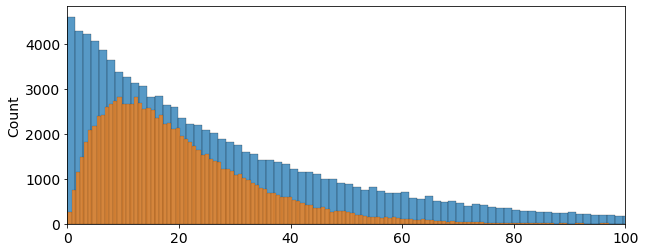

In [9]:
y0 = dist.Exponential(1/30).sample(jax.random.PRNGKey(0), sample_shape=(100000,))
y1 = dist.Gamma(2, 0.1).sample(jax.random.PRNGKey(1), sample_shape=(100000,))

plt.figure(figsize=(10, 4))

sns.histplot(y0, color='C0')
sns.histplot(y1, color='C1')

plt.xlim([0, 100]);